In [1]:
import ai2thor
from ai2thor.controller import Controller,BFSController
from ai2thor.platform import CloudRendering

from ithor_tools.vis_tool import *
from ithor_tools.transform import cornerpoint_projection
from ithor_tools.map import single_scenemap

In [2]:
gridSize=0.05
scene_name = "FloorPlan_Train8_1"
controller = Controller(
    agentMode="locobot",
    visibilityDistance=5.0,
    scene = scene_name,
    gridSize=gridSize,
    movementGaussianSigma=0,
    rotateStepDegrees=90,
    rotateGaussianSigma=0,
    renderClassImage = True,
    renderDepthImage=True,
    renderInstanceSegmentation=False,
    width=300,
    height=300,
    fieldOfView=60
)

In [12]:
controller.reset(
    # makes the images a bit higher quality
    width=800,
    height=800,

    # Renders several new image modalities
    renderDepthImage=True,
    renderClassImage = True,
    renderSemanticSegmentation=False,
    renderNormalsImage=False
)
scene_bounds = controller.last_event.metadata['sceneBounds']['center']

controller.step(
    action="AddThirdPartyCamera",
    position=dict(x=scene_bounds['x'], y=5.0, z=scene_bounds['z']),
    rotation=dict(x=90, y=0, z=0),
    orthographic=True,
    orthographicSize= 5.0, fieldOfView=100,
    skyboxColor="white"
)
controller.step(dict(action='GetReachablePositions'))
rstate = controller.last_event.metadata['actionReturn']

controller.step(
    action="Teleport",
    position = rstate[200],
    rotation = dict(x=0,y=0,z=0)
)



<ai2thor.server.Event at 0x7f9ecf6d5df0
    .metadata["lastAction"] = Teleport
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

In [8]:
objects = controller.last_event.metadata['objects']
df = show_objects_table(objects)
df

Object Metadata. Not showing objectOrientedBoundingBox, axisAlignedBoundingBox, and receptacleObjectIds for clarity.


,objectType,objectId,name,position[x],position[y],position[z],rotation[x],rotation[y],rotation[z],distance,...,openness,pickupable,isPickedUp,moveable,mass,salientMaterials,assetId,parentReceptacles,controlledObjects,isMoving
0,Plate,Plate|+01.86|+00.73|-01.18,Plate_26,1.8645,0.7321,-1.1818,359.8788,16.2492,359.9527,4.3646,...,0.0,True,False,False,0.62,[Ceramic],Plate_26,[SideTable|+01.59|+00.00|-01.17],None,False
1,Bottle,Bottle|+05.66|+00.54|-02.50,Bottle_1,5.6640,0.5446,-2.4960,359.9635,359.9903,359.9713,1.6752,...,0.0,True,False,False,0.20,[Glass],Bottle_1,[CoffeeTable|+05.45|+00.00|-02.95],None,False
2,HousePlant,HousePlant|+05.42|+00.55|-02.95,Houseplant_6,5.4193,0.5468,-2.9490,0.0490,0.0522,359.8313,1.1875,...,0.0,False,False,True,3.00,"[Ceramic, Organic]",Houseplant_6,[CoffeeTable|+05.45|+00.00|-02.95],None,False
3,Apple,Apple|+05.38|+00.61|-03.39,Apple_6,5.3818,0.6092,-3.3868,310.4292,307.2209,267.1528,0.7607,...,0.0,True,False,False,0.20,[Food],Apple_6,[CoffeeTable|+05.45|+00.00|-02.95],None,False
4,Bowl,Bowl|+05.66|+00.54|-03.35,Bowl_6,5.6636,0.5450,-3.3521,0.0019,359.9756,0.0093,0.9368,...,0.0,True,False,False,0.47,[Ceramic],Bowl_6,[CoffeeTable|+05.45|+00.00|-02.95],None,False
5,BasketBall,BasketBall|+07.12|+00.17|-01.90,Basketball_1,7.1227,0.1660,-1.9024,7.9563,286.2621,91.9585,3.0074,...,0.0,True,False,False,0.60,[Rubber],Basketball_1,"[ShelvingUnit|+07.10|+00.00|-01.96, Floor|+00....",None,False
6,AlarmClock,AlarmClock|+01.31|+00.48|-04.01,Alarm_Clock_6,1.3060,0.4778,-4.0129,0.0043,74.9883,0.0133,3.8674,...,0.0,True,False,False,0.80,"[Metal, Plastic, Glass]",Alarm_Clock_6,"[SideTable|+01.21|+00.00|-04.25, Floor|+00.00|...",None,False
7,Television,Television|+09.53|+00.96|-03.10,Television_6,9.5309,0.9628,-3.1030,0.1047,269.9915,0.0799,4.4825,...,0.0,False,False,True,9.83,"[Plastic, Metal]",Television_6,"[SideTable|+09.60|+00.00|-03.08, Floor|+00.00|...",[],False
8,RemoteControl,RemoteControl|+01.15|+00.48|-04.24,Remote_3,1.1509,0.4773,-4.2404,0.0190,345.4326,359.9791,4.0260,...,0.0,True,False,False,0.15,"[Metal, Plastic]",Remote_3,"[SideTable|+01.21|+00.00|-04.25, Floor|+00.00|...",None,False
9,TennisRacket,TennisRacket|+03.73|+00.50|-02.84,Tennis_Racket_3,3.7317,0.4986,-2.8410,88.3435,178.6615,164.9708,1.9066,...,0.0,True,False,False,0.31,"[Metal, Plastic]",Tennis_Racquet_3,"[CoffeeTable|+03.44|00.00|-02.69, Floor|+00.00...",None,False


In [103]:
query_object = objects[4]
controller.step(
    action="Teleport",
    position = rstate[3600],
    rotation = dict(x=0,y=180,z=0)
)
print(len(rstate))

7243


0.6868000030517578 10.446799278259277 -5.351839542388916 0.5981607437133789
(98, 59)
(418, 713, 3)


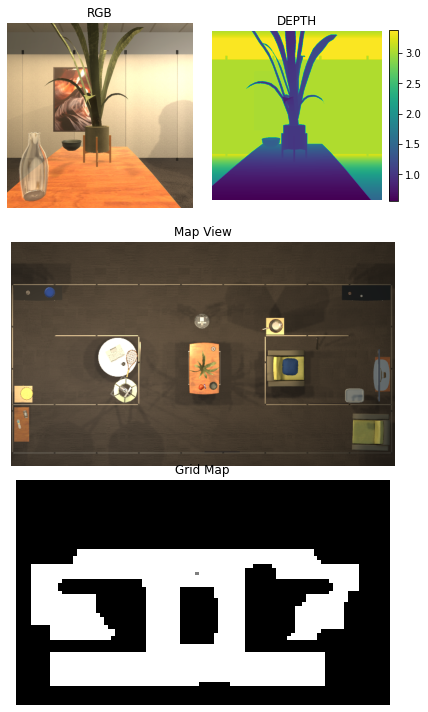

In [104]:
scene_bounds = controller.last_event.metadata['sceneBounds']['cornerPoints']
scene_bounds = cornerpoint_projection(scene_bounds)
sm = single_scenemap(scene_bounds,rstate,stepsize = 0.1)

pos = controller.last_event.metadata['agent']['position']
imshow_grid = sm.plot(pos)
plot_frames(controller.last_event,imshow_grid)

In [105]:
controller.last_event.metadata['agent']

{'name': 'agent',
 'position': {'x': 5.400000095367432,
  'y': 0.9009996652603149,
  'z': -1.8500001430511475},
 'rotation': {'x': -0.0, 'y': 180.0, 'z': 0.0},
 'cameraHorizon': 0.0,
 'isStanding': None,
 'inHighFrictionArea': False}

In [106]:
def get_gt_box(controller,query_object_IDs,show=False):
    instance_segmentation = controller.last_event.instance_segmentation_frame
    obj_colors = controller.last_event.object_id_to_color
    temp = np.zeros((instance_segmentation.shape[0],instance_segmentation.shape[1]))    
    for query_object_ID in query_object_IDs:
        query_color = obj_colors[query_object_ID]
        
        # print(controller.last_event.object_id_to_color)
        R = (instance_segmentation[:,:,0]==query_color[0])
        G = (instance_segmentation[:,:,1]==query_color[1])
        B = (instance_segmentation[:,:,2]==query_color[2])
        total = R & G & B
        temp[total] = +1
    if show:
        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(controller.last_event.frame)
        plt.axis('off')
        plt.subplot(1,2,2)
        plt.imshow(temp)
        plt.axis('off')
        plt.show()

    # thres = np.max(temp)
    # if thres < 3:
    #     thres = 3
    temp = np.where(temp>=1)
    try:
        GT_box = [min(temp[1]),min(temp[0]),max(temp[1]),max(temp[0])]
        return GT_box
    except:
        return None

In [107]:
import open3d as o3d
import math

def to_rad(th):
    return th*math.pi / 180

width = 800
height = 800
fov = 60
# camera intrinsics
focal_length = 0.5 * width / math.tan(to_rad(fov/2))
fx, fy, cx, cy = (focal_length,focal_length, width/2, height/2)
intrinsic = o3d.camera.PinholeCameraIntrinsic(width, height, 
                        fx, fy, cx, cy)

In [126]:
DEPTH = controller.last_event.depth_frame
COLOR = controller.last_event.frame
GRAY = (COLOR.sum(axis=-1)/(3*255)).astype(np.float32)
# COLOR = COLO
print(GRAY.dtype)
depth = o3d.geometry.Image(DEPTH)
color = o3d.geometry.Image(GRAY)
rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(color, depth,
                                                            depth_scale=1.0,
                                                            depth_trunc=5.0,
                                                            convert_rgb_to_intensity=False)

float32


In [127]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd, intrinsic)
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])


PointCloud with 640000 points.

In [128]:
rot = controller.last_event.metadata['agent']['rotation']['y']
rot = math.pi*rot/180
agent_pos = controller.last_event.metadata['agent']['position']
print(rot,agent_pos)
pcd.transform([[-math.sin(rot), 0,-math.cos(rot), agent_pos['z']],
                [0, 1, 0, agent_pos['y']],
                [math.cos(rot), 0, -math.sin(rot), agent_pos['x']],
                [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

3.141592653589793 {'x': 5.400000095367432, 'y': 0.9009996652603149, 'z': -1.8500001430511475}


In [111]:
temp = np.asarray(pcd.points)
temp

array([[-4.85810781,  2.63773143,  7.13673186],
       [-4.85810781,  2.63773143,  7.13239003],
       [-4.85810781,  2.63773143,  7.12804821],
       ...,
       [-3.35088468,  0.03662992,  4.53996303],
       [-3.35088468,  0.03662992,  4.53779669],
       [-3.35088468,  0.03662992,  4.53563035]])

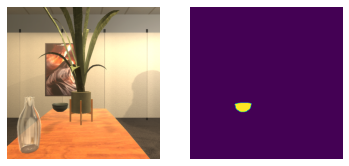

[234, 506, 321, 553]

In [112]:
def get_gt_box(controller,query_object_IDs,show=False):
    instance_segmentation = controller.last_event.instance_segmentation_frame
    obj_colors = controller.last_event.object_id_to_color
    temp = np.zeros((instance_segmentation.shape[0],instance_segmentation.shape[1]))    
    for query_object_ID in query_object_IDs:
        query_color = obj_colors[query_object_ID]
        
        # print(controller.last_event.object_id_to_color)
        R = (instance_segmentation[:,:,0]==query_color[0])
        G = (instance_segmentation[:,:,1]==query_color[1])
        B = (instance_segmentation[:,:,2]==query_color[2])
        total = R & G & B
        temp[total] = +1
    if show:
        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(controller.last_event.frame)
        plt.axis('off')
        plt.subplot(1,2,2)
        plt.imshow(temp)
        plt.axis('off')
        plt.show()

    # thres = np.max(temp)
    # if thres < 3:
    #     thres = 3
    temp = np.where(temp>=1)
    try:
        GT_box = [min(temp[1]),min(temp[0]),max(temp[1]),max(temp[0])]
        return GT_box
    except:
        return None
    # plt.imshow(instance_seg
gt_box = get_gt_box(controller,[query_object['objectId']],show=True)
gt_box

In [113]:
points = np.asarray(pcd.points)
print(points.shape)
points = np.resize(points, (width,height,3))
points = points[gt_box[1]:gt_box[3],gt_box[0]:gt_box[2],:]

(640000, 3)


In [114]:
new_height = points.shape[0]
new_width = points.shape[1]
points = np.resize(points,(new_height*new_width,3))

In [115]:
new_pcd = o3d.geometry.PointCloud()
new_pcd.points = o3d.utility.Vector3dVector(points)
# o3d.visualization.draw_geometries([new_pcd])

In [116]:
temp = np.asarray(new_pcd.points)
temp

array([[-4.88490844,  0.43666531,  6.12716522],
       [-4.88490844,  0.43666531,  6.12278471],
       [-4.88490844,  0.43666531,  6.11840419],
       ...,
       [-3.35194862,  0.57148253,  5.57776592],
       [-3.35226297,  0.57141356,  5.57563479],
       [-3.35257959,  0.5713441 ,  5.57350303]])

In [117]:
new_point = new_pcd.points
print(range(int(2*new_height/5),int(3*new_height/5)),range(int(2*new_width/5),int(3*new_width/5)))
new_point = np.resize(new_point, (new_height,new_width,3))
new_range = new_point[int(2*new_height/5):int(3*new_height/5),int(2*new_width/5):int(3*new_width/5),:]
print(new_point.shape)
new_range = new_range.reshape(-1,3)
new_range = new_range.mean(axis=0)

range(18, 28) range(34, 52)
(47, 87, 3)


In [118]:
print(new_range,agent_pos)

[-3.25968294  0.63953598  5.65127417] {'x': 5.400000095367432, 'y': 0.9009996652603149, 'z': -1.8500001430511475}


[[10.446799278259277, 0.5981607437133789], [10.446799278259277, -5.351839542388916], [0.6868000030517578, 0.5981607437133789], [0.6868000030517578, -5.351839542388916]]
(418, 713, 3)


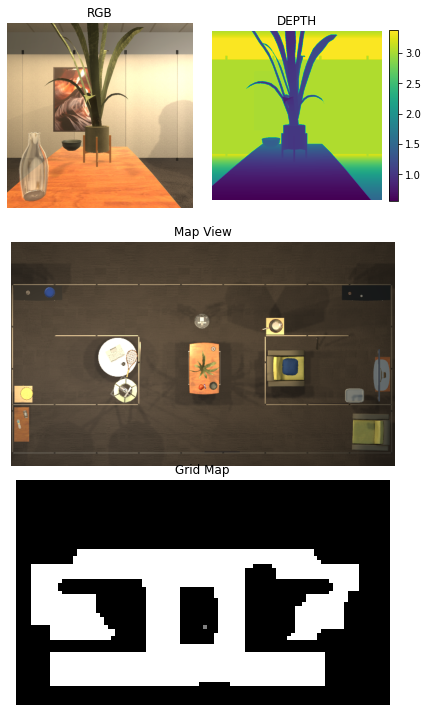

In [119]:
print(scene_bounds)
new_pos = dict(x=new_range[2],y=0.91,z=new_range[0])
imshow_grid = sm.plot(new_pos)
plot_frames(controller.last_event,imshow_grid)